In [1]:
import pandas as pd
import pybaseball
import numpy as np

In [5]:
df = pd.read_csv("statcast_data/2023.csv")
bbe = pd.read_csv("statcast_data/bbe/bbe_2023.csv")

In [6]:
df.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,FC,2023-05-29,89.0,-1.70,5.78,"Leclerc, José",628451,600917,field_out,...,5,5,0,0,5,Standard,Standard,150.0,0.000,-0.121
1,1,FF,2023-05-29,94.7,-1.63,5.82,"Leclerc, José",628451,600917,NaN,...,5,5,0,0,5,Standard,Standard,194.0,0.000,-0.028
2,2,FF,2023-05-29,94.7,-1.37,5.89,"Leclerc, José",628451,600917,NaN,...,5,5,0,0,5,Standard,Standard,192.0,0.000,0.024
3,3,FF,2023-05-29,95.9,-1.17,5.94,"Leclerc, José",628451,600917,NaN,...,5,5,0,0,5,Standard,Standard,198.0,0.000,0.021
4,4,FC,2023-05-29,88.9,-1.61,5.83,"Leclerc, José",606992,600917,grounded_into_double_play,...,5,5,0,0,5,Standard,Standard,137.0,-0.015,-0.505


In [7]:
bbe.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,theta,theta_deg,hit_direction,pull,oppo,pulled_barrel,rf_xwoba,sxwOBA,sxwoba_probs,sxwoba_prob_model
0,0,FC,2023-05-29,89.0,-1.70,5.78,"Leclerc, José",628451,600917,field_out,...,1.389013,79.584601,left,1,0,0,0.344193,0.198328,[0. 0.04 0.01 0. 0. 0.01 0.94],0.8945
1,4,FC,2023-05-29,88.9,-1.61,5.83,"Leclerc, José",606992,600917,grounded_into_double_play,...,1.172619,67.186145,left,1,0,0,0.108279,0.077448,[0. 0.03 0. 0. 0. 0. 0.97],0.9000
2,17,FF,2023-05-29,88.6,1.21,5.67,"Alexander, Tyler",608369,641302,grounded_into_double_play,...,0.039922,2.287346,right,1,0,0,0.393275,0.249225,[0. 0.01 0.07 0. 0.01 0. 0.91],0.9355
3,19,FC,2023-05-29,87.6,1.25,5.58,"Alexander, Tyler",543760,641302,single,...,0.963140,55.183854,center,0,0,0,0.470818,0.600361,[0. 0.85 0.05 0.01 0.01 0. 0.08],0.9355
4,22,SI,2023-05-29,97.9,-1.35,5.29,"Hernández, Jonathan",570731,642546,field_out,...,0.335400,19.217004,right,0,1,0,-0.012965,-0.035198,[0. 0. 0. 0. 0. 0. 1.],0.9000


In [65]:
pybaseball.playerid_reverse_lookup([23312], key_type='fangraphs')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last


In [63]:
fg = pybaseball.fg_batting_data(2023, qual=1)
fg[fg['Team'] == 'OAK'].head(15)

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
54,23312,2023,Ryan Noda,OAK,27,50,133,170,32,15,...,113.9,37,0.468,79,0.171,0.317,0.207,0.402,0.354,1.5
58,19627,2023,Brent Rooker,OAK,28,48,165,195,43,24,...,112.0,56,0.491,114,0.138,0.305,0.269,0.522,0.387,1.2
263,21780,2023,Esteury Ruiz,OAK,24,54,213,236,57,42,...,109.5,37,0.214,173,0.154,0.276,0.234,0.313,0.277,0.6
155,10642,2023,Carlos Perez,OAK,32,31,79,89,22,17,...,105.2,19,0.322,59,0.189,0.294,0.258,0.374,0.313,0.4
341,17128,2023,Ramon Laureano,OAK,28,39,146,155,30,15,...,110.9,31,0.320,97,0.144,0.278,0.215,0.381,0.275,0.4
237,26368,2023,J.J. Bleday,OAK,25,19,60,67,13,7,...,107.9,18,0.391,46,0.167,0.270,0.216,0.317,0.274,0.1
334,22650,2023,Jordan Diaz,OAK,22,24,69,72,15,10,...,111.8,24,0.462,52,0.120,0.288,0.238,0.396,0.288,0.1
382,12325,2023,Jace Peterson,OAK,33,47,144,165,28,22,...,110.1,28,0.277,101,0.212,0.302,0.207,0.342,0.286,0.0
477,15730,2023,Tyler Wade,OAK,28,10,13,16,1,1,...,103.5,2,0.400,5,0.190,0.321,0.094,0.100,0.201,-0.1
264,19983,2023,Conner Capel,OAK,26,26,66,75,17,13,...,104.6,8,0.182,44,0.192,0.306,0.237,0.288,0.284,-0.1


In [58]:
fg.Team.unique

<bound method Series.unique of 16     ATL
15     ATL
74     TBR
17     LAD
32     TOR
      ... 
459    SEA
438    MIA
501    KCR
489    LAD
413    HOU
Name: Team, Length: 517, dtype: object>

In [68]:
pybaseball.playerid_lookup('Garcia', 'Luis', fuzzy=True)

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,garcia,luis,408202,garcl003,garcilu02,140,2002.0,2002.0
1,garcia,luis,150193,garcl002,garcilu01,1004504,1999.0,1999.0
2,garcia,luis,677651,garcl007,garcilu05,23735,2020.0,2023.0


In [73]:
look = pybaseball.playerid_lookup('Sanchez', 'Jesus', fuzzy=True)
look['mlb_played_last'].replace('', np.nan, inplace=True)
look = look.loc[look['mlb_played_last'] > 2019]
look.head()

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last


In [71]:
fg.Team.unique()

array(['ATL', 'TBR', 'LAD', 'TOR', 'TEX', 'NYY', 'STL', 'HOU', 'NYM',
       'CHC', 'SDP', 'ARI', 'SFG', 'LAA', 'BAL', 'CHW', 'CIN', 'DET',
       'BOS', 'SEA', 'WSN', 'COL', 'PHI', 'OAK', 'PIT', 'CLE', 'MIL',
       'MIA', 'KCR', 'MIN', '- - -'], dtype=object)

In [72]:
fg['first_name'] = fg['Name'].str.split(n=1).str[0]
fg['last_name'] = fg['Name'].str.split(n=1).str[1]
fg[fg['Team']=='WSN'].sample(8)

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,first_name,last_name
111,13324,2023,Ildemaro Vargas,WSN,31,16,41,43,13,9,...,0.300,40,0.211,0.254,0.323,0.447,0.342,0.2,Ildemaro,Vargas
331,19296,2023,Alex Call,WSN,28,51,179,207,38,26,...,0.316,136,0.205,0.280,0.225,0.334,0.298,-0.2,Alex,Call
121,22202,2023,Jeter Downs,WSN,24,1,1,2,0,0,...,NaN,0,0.000,0.222,NaN,NaN,0.349,0.0,Jeter,Downs
320,19610,2023,Keibert Ruiz,WSN,24,44,166,184,38,27,...,0.349,152,0.149,0.209,0.284,0.464,0.354,-0.3,Keibert,Ruiz
215,14366,2023,Joey Meneses,WSN,31,50,210,223,62,47,...,0.470,166,0.181,0.287,0.258,0.363,0.290,0.0,Joey,Meneses
116,16939,2023,Lane Thomas,WSN,27,52,202,221,58,39,...,0.386,145,0.218,0.298,0.252,0.391,0.310,0.9,Lane,Thomas
282,20391,2023,Luis Garcia,WSN,23,46,180,196,49,38,...,0.363,160,0.133,0.205,0.295,0.472,0.349,0.2,Luis,Garcia
312,19273,2023,Stone Garrett,WSN,27,28,94,103,24,19,...,0.516,62,0.148,0.313,0.248,0.407,0.314,0.3,Stone,Garrett


In [74]:
fg[fg['Name'] == 'Casey Schmitt']

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,first_name,last_name
118,27577,2023,Casey Schmitt,SFG,24,19,71,72,23,16,...,0.404,57,0.149,0.308,0.304,0.463,0.333,0.6,Casey,Schmitt


In [11]:
def get_mlbam_id(row):
    try:
        print('looking up mlbam id for', row['Name'])
        result = pybaseball.playerid_lookup(row['last_name'], row['first_name'], fuzzy=True).iloc[0]
        return result['key_mlbam']
    except:
        print('failed to find mlbam id for', row['Name'])
        return None

fg['mlbam_id'] = fg.apply(get_mlbam_id, axis=1)

looking up mlbam id for Sean Murphy
name_last              murphy
name_first               sean
key_mlbam              669221
key_retro            murps001
key_bbref           murphse01
key_fangraphs           19352
mlb_played_first       2019.0
mlb_played_last        2023.0
Name: 0, dtype: object
looking up mlbam id for Ronald Acuna Jr.
No identically matched names found! Returning the 5 most similar names.
name_last               acuña
name_first             ronald
key_mlbam              660670
key_retro            acunr001
key_bbref           acunaro01
key_fangraphs           18401
mlb_played_first       2018.0
mlb_played_last        2023.0
Name: 0, dtype: object
looking up mlbam id for Wander Franco
name_last              franco
name_first             wander
key_mlbam              677551
key_retro            franw002
key_bbref           francwa01
key_fangraphs           23667
mlb_played_first       2021.0
mlb_played_last        2023.0
Name: 0, dtype: object
looking up mlbam id for 

In [12]:
fg.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,first_name,last_name,mlbam_id
16,19352,2023,Sean Murphy,ATL,28,44,155,184,45,24,...,114,0.165,0.279,0.299,0.605,0.434,2.8,Sean,Murphy,669221
15,18401,2023,Ronald Acuna Jr.,ATL,25,53,210,241,70,43,...,177,0.143,0.225,0.344,0.656,0.458,2.7,Ronald,Acuna Jr.,660670
74,23667,2023,Wander Franco,TBR,22,53,211,235,63,39,...,182,0.183,0.234,0.289,0.469,0.358,2.3,Wander,Franco,677551
17,5361,2023,Freddie Freeman,LAD,33,54,215,248,72,40,...,177,0.127,0.219,0.333,0.593,0.423,2.6,Freddie,Freeman,518692
32,19612,2023,Bo Bichette,TOR,25,54,231,245,78,55,...,194,0.117,0.210,0.343,0.562,0.405,2.9,Bo,Bichette,666182


In [4]:
df = pybaseball.statcast('2021-04-01', '2021-04-10')

This is a large query, it may take a moment to complete


100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


In [5]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2979,FF,2021-04-10,95.4,1.4,6.75,"Smith, Will",596451,519293,field_out,hit_into_play,...,5,4,5,4,5,Standard,Standard,154,0.035,-0.134
3121,SL,2021-04-10,83.5,1.69,6.67,"Smith, Will",596451,519293,NaN,ball,...,5,4,5,4,5,Standard,Standard,317,0.0,0.043
3221,SL,2021-04-10,82.2,1.68,6.69,"Smith, Will",596451,519293,NaN,called_strike,...,5,4,5,4,5,Strategic,Standard,314,0.0,-0.028
3345,FF,2021-04-10,93.3,1.6,6.78,"Smith, Will",596451,519293,NaN,called_strike,...,5,4,5,4,5,Strategic,Standard,149,0.0,-0.024
3464,SL,2021-04-10,81.0,1.81,6.69,"Smith, Will",596451,519293,NaN,ball,...,5,4,5,4,5,Strategic,Standard,316,0.0,0.024


In [9]:
bbe = pd.read_csv("statcast_data/bbe/bbe_2021.csv", index_col=0)

In [10]:
bbe.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,field_y,theta,theta_deg,hit_direction,pull,pulled_barrel,rf_xwoba,sxwOBA,sxwoba_probs,sxwoba_prob_model
0,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,field_out,hit_into_play,...,138.097954,1.563321,89.571683,left,1,0,0.168199,1.018364,[0.01 0.09 0.08 0. 0. 0.82],0.18044
4,CU,2021-10-03,84.2,-2.45,6.40,"Jackson, Luke",596019,592426,field_out,hit_into_play,...,178.035345,1.379733,79.052872,left,0,0,0.314677,0.363632,[0. 0.11 0.01 0. 0. 0.88],0.10985
5,FF,2021-10-03,98.6,-1.74,5.81,"Strider, Spencer",596019,675911,field_out,hit_into_play,...,37.773644,0.397321,22.764804,right,1,0,0.030748,-0.009795,[0. 0. 0. 0. 0. 1.],0.00000
12,FF,2021-10-03,96.9,-1.90,5.65,"Morton, Charlie",596019,450203,field_out,hit_into_play,...,233.345238,0.902071,51.684851,center,0,0,0.211772,0.029124,[0. 0. 0. 0. 0. 1.],0.00000
16,FF,2021-10-02,92.3,-2.96,6.02,"Rodríguez, Richard",596019,593144,field_out,hit_into_play,...,199.248549,0.757463,43.399424,center,0,0,1.114673,0.360150,[0. 0. 0.03 0.02 0.1 0.85],0.27705


(array([8606., 8331., 8496., 8618., 8332., 8246., 8870., 8446., 8478.,
        8077.]),
 array([     0.,  48893.,  97786., 146679., 195572., 244465., 293358.,
        342251., 391144., 440037., 488930.]),
 <BarContainer object of 10 artists>)

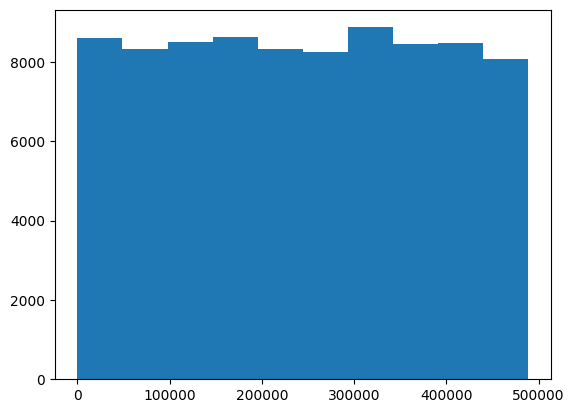

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(bbe.index.tolist())

In [1]:
import pandas as pd
from preprocess_data import preprocess_data
df = pd.read_csv("statcast_data/2023.csv", index_col=0)
df, bbe = preprocess_data(df)

In [2]:
bbe.shape

(41211, 106)

In [3]:
bbe.loc[bbe['batter'] == 669477].head(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_name,hc_x_adj,hc_y_adj,field_x,field_y,theta,theta_deg,hit_direction,pull,pulled_barrel
309,CH,2023-05-29,80.5,2.10,5.47,"Zastryzny, Rob",669477,642239,field_out,hit_into_play,...,casey schmitt,-24.90,105.82,57.219081,92.432998,1.016499,58.241123,center,0,0
351,ST,2023-05-29,82.4,-2.49,5.48,"Bolton, Cody",669477,675989,single,hit_into_play,...,casey schmitt,-66.06,86.01,14.106780,107.529728,1.440352,82.526073,left,1,0
412,CU,2023-05-29,71.9,1.33,5.92,"Hill, Rich",669477,448179,field_out,hit_into_play,...,casey schmitt,-6.61,28.26,15.308862,24.656813,1.015167,58.164783,center,0,0
459,FC,2023-05-29,82.0,1.64,5.60,"Hill, Rich",669477,448179,single,hit_into_play,...,casey schmitt,-20.95,90.26,49.009571,78.637345,1.013467,58.067382,center,0,0
501,CU,2023-05-29,72.6,1.45,5.83,"Hill, Rich",669477,448179,double,hit_into_play,...,casey schmitt,-63.46,140.73,54.638141,144.384134,1.209029,69.272252,left,1,1
10728,SI,2023-05-27,95.5,-0.64,5.73,"Burnes, Corbin",669477,669203,field_out,hit_into_play,...,casey schmitt,44.50,130.63,123.835611,60.903107,0.457071,26.188240,right,0,0
10880,FC,2023-05-27,94.8,-0.67,5.89,"Burnes, Corbin",669477,669203,field_out,hit_into_play,...,casey schmitt,-4.25,155.78,107.147891,113.158298,0.812673,46.562759,center,0,0
14297,FF,2023-05-26,91.4,0.74,6.44,"Small, Ethan",669477,663629,field_out,hit_into_play,...,casey schmitt,61.50,102.80,116.177644,29.203510,0.246267,14.110068,right,0,0
14353,FF,2023-05-26,92.4,0.73,6.43,"Small, Ethan",669477,663629,single,hit_into_play,...,casey schmitt,-67.02,91.58,17.366543,112.147135,1.417162,81.197381,left,1,0
14410,SI,2023-05-26,97.1,-2.48,5.32,"Peguero, Elvis",669477,665625,force_out,hit_into_play,...,casey schmitt,-28.04,34.27,4.405275,44.059824,1.471144,84.290317,left,1,0


In [4]:
from train_models import train_model
from results_processing import calculate_expected_xwoba, postprocess_data
bbe = train_model(bbe, 2023)
leaders, sxwoba_leaders = calculate_expected_xwoba(df, bbe, 2023)

KeyError: "['sprint_speed'] not in index"

In [5]:
import requests
from bs4 import BeautifulSoup

def get_game_ids(date: str):
    url = f"https://www.milb.com/scores/{date}/triple-a"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    game_ids = []
    links = soup.find_all('a', attrs={'data-mlb-test': 'productlink-box'})  # target the correct 'a' elements
    for link in links:
        href = link.get('href')
        if href:
            game_id = href.split('/')[-3]  # get the game id, which is the element before 'final/box'
            game_ids.append(game_id)

    return game_ids

game_ids = []
for day in range(1, 5):  # adjust this range for the dates you are interested in
    date = f"2023-06-{day:02d}"  # This formats the day as a two-digit number, e.g. "01" instead of "1"
    game_ids += get_game_ids(date)

print(game_ids)


['723864', '723153', '723581', '723377', '723735', '723006', '723456', '725472', '725556', '723080', '721787', '721624', '721489', '725153', '721857', '723732', '723150', '723002', '725469', '723584', '723452', '723861', '725556', '723373', '723079', '721779', '721626', '725555', '721481', '725154', '721855', '723860', '723731', '723148', '723451', '723004', '725471', '723586', '725553', '723376', '723081', '721780', '721629', '721478', '725149', '721849', '723375', '723005', '725467', '723151', '723862', '723582', '723450', '725552', '721479', '721781', '721850', '725155', '723736', '723071', '721627']


In [6]:
from pybaseball import statcast_single_game

In [13]:
df = pd.read_csv('statcast_data/current.csv')

In [23]:
df.groupby('batter_team')['sxwOBA'].mean().sort_values(ascending=False).round(3)

batter_team
LAD    0.355
ATL    0.351
TB     0.346
STL    0.343
TEX    0.342
TOR    0.339
BAL    0.334
BOS    0.334
NYM    0.333
SF     0.332
LAA    0.331
CHC    0.330
NYY    0.327
MIN    0.323
AZ     0.323
PIT    0.322
HOU    0.322
SEA    0.321
WSH    0.321
DET    0.320
SD     0.320
MIA    0.319
CLE    0.317
CIN    0.317
PHI    0.313
MIL    0.312
CWS    0.312
KC     0.311
COL    0.310
OAK    0.300
Name: sxwOBA, dtype: float64

In [24]:
import numpy as np
df['pitcher_team'] = np.where(df['inning_topbot'] == 'Top', df['home_team'], df['away_team'])
df.groupby('pitcher_team')['sxwOBA'].mean().sort_values(ascending=True).round(3)


pitcher_team
MIN    0.295
SEA    0.305
TEX    0.309
HOU    0.310
PHI    0.312
SD     0.312
TB     0.314
NYY    0.315
TOR    0.320
CHC    0.320
MIA    0.321
ATL    0.321
LAA    0.322
DET    0.324
SF     0.324
LAD    0.326
PIT    0.329
NYM    0.329
CLE    0.329
MIL    0.329
BAL    0.332
AZ     0.332
CIN    0.332
BOS    0.332
STL    0.334
KC     0.339
CWS    0.341
COL    0.348
WSH    0.353
OAK    0.366
Name: sxwOBA, dtype: float64

In [19]:
df['woba_value'].mean()

0.32650156067723946

In [20]:
df['sxwOBA'].mean()

0.326118723056942

In [21]:
df['estimated_woba_using_speedangle'].mean()

0.37581038157925556

In [22]:
df['rf_xwoba'].mean()

0.32611754458877035

In [30]:
pd.set_option('display.max_columns', None)
df.loc[df['game_date'] > ''].groupby('player_name')['release_extension'].mean().reset_index().sort_values('release_extension', ascending=False).head(20)

,player_name,release_extension
159,"Díaz, Alexis",7.718384
284,"Joyce, Ben",7.575000
211,"Glasnow, Tyler",7.554217
487,"Romano, Jordan",7.509770
616,"Williams, Devin",7.490146
206,"Gilbert, Logan",7.488454
615,"Whitlock, Garrett",7.414286
597,"Walker, Josh",7.395238
171,"Falter, Bailey",7.329501
380,"Megill, Tylor",7.325289


In [34]:
df['plane'] = df['release_pos_z'].sub(df['plate_z'])

In [42]:
df.loc[df['pitch_type']=='FF'].groupby('player_name')['plane'].agg(['mean', 'count']).reset_index().sort_values('count', ascending=False).head(50)

,player_name,mean,count
264,"Kopech, Michael",2.847899,671
468,"Strider, Spencer",3.237424,660
94,"Cole, Gerrit",3.027271,656
183,"Gore, MacKenzie",3.299137,649
460,"Steele, Justin",3.340388,618
450,"Snell, Blake",3.981316,608
238,"Javier, Cristian",2.486800,600
420,"Ryan, Joe",2.002589,587
169,"Gausman, Kevin",3.454343,571
190,"Greene, Hunter",3.143662,557


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_sprint_speed_data(min_season, max_season, min_opportunities):
    base_url = "https://baseballsavant.mlb.com/leaderboard/sprint_speed"
    params = {
        "min_season": min_season,
        "max_season": max_season,
        "min": min_opportunities,
        "position": "",
        "team": ""
    }
    response = requests.get(base_url, params=params)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table on the page
    table = soup.find('table')

    # Get the headers of the table
    headers = [header.text for header in table.find_all('th')]

    # Get the rows of the table
    rows = table.find_all('tr')

    # For each row, get the columns and add them to the data
    data = []
    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Create a pandas DataFrame from the data
    df = pd.DataFrame(data, columns=headers)

    return df


In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('statcast_data/2022.csv')

In [4]:
df[['events', 'woba_value', 'description']].groupby('events')['woba_value'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
catcher_interf,74.0,0.700,0.000,0.70,0.70,0.70,0.70,0.70
caught_stealing_2b,204.0,0.000,0.000,0.00,0.00,0.00,0.00,0.00
caught_stealing_3b,10.0,0.000,0.000,0.00,0.00,0.00,0.00,0.00
caught_stealing_home,12.0,0.000,0.000,0.00,0.00,0.00,0.00,0.00
double,7809.0,1.250,0.000,1.25,1.25,1.25,1.25,1.25
double_play,390.0,0.000,0.000,0.00,0.00,0.00,0.00,0.00
field_error,1113.0,0.900,0.000,0.90,0.90,0.90,0.90,0.90
field_out,72242.0,0.000,0.000,0.00,0.00,0.00,0.00,0.00
fielders_choice,375.0,0.893,0.080,0.00,0.90,0.90,0.90,0.90


In [19]:
df[['events', 'estimated_woba_using_speedangle', 'description']].groupby('events')['estimated_woba_using_speedangle'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
events,,,,,,,,
catcher_interf,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caught_stealing_2b,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caught_stealing_3b,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caught_stealing_home,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
double,7796.0,0.657,0.346,0.003,0.410,0.655,0.868,2.014
double_play,389.0,0.418,0.270,0.000,0.206,0.427,0.598,1.968
field_error,1106.0,0.206,0.162,0.000,0.089,0.165,0.276,1.353
field_out,71894.0,0.215,0.245,0.000,0.039,0.131,0.293,1.979
fielders_choice,375.0,0.178,0.125,0.021,0.082,0.149,0.244,0.640


In [17]:
df['woba_value'].mean()

0.3177216182898128

In [14]:
pd.set_option('display.max_columns', None)
df.loc[df['events']=='strikeout'][['woba_value', 'des', 'description']].nlargest(10, 'woba_value').head(10)


,woba_value,des,description
21054,0.7,Rafael Devers strikes out swinging. Enrique ...,swinging_strike
70798,0.7,Jake McCarthy strikes out swinging. Josh Roj...,swinging_strike
92727,0.7,Tyler O'Neill strikes out swinging. Tyler O'...,swinging_strike
117238,0.7,Matt Chapman strikes out swinging. Teoscar H...,swinging_strike
121109,0.7,Lane Thomas strikes out swinging. Victor Rob...,swinging_strike_blocked
130063,0.7,Josh Rojas strikes out swinging. Carson Kell...,swinging_strike
142268,0.7,Nick Allen strikes out swinging. Nick Allen ...,swinging_strike
148093,0.7,Victor Reyes strikes out swinging. Victor Re...,swinging_strike
158847,0.7,Nick Gordon strikes out swinging. Nick Gordo...,swinging_strike
159359,0.7,Mookie Betts strikes out swinging. Trayce Th...,swinging_strike


In [33]:
current = pd.read_csv('statcast_data/current.csv')

In [22]:
current['woba_value'].mean()

0.32650156067723946

In [24]:
df_2023 = pd.read_csv('statcast_data/2023.csv')

In [25]:
df_2023['woba_value'].mean()

0.32650156067723946

In [34]:
current.loc[current['target']!=-1]['woba_value'].mean()

0.3259679138053517

In [35]:
current.loc[current['target']!=-1]['sxwOBA'].mean()

0.3259632986276844

(array([45542.,     0.,     0.,  6499., 10161.,     0.,  3072.,     0.,
          243.,  2051.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

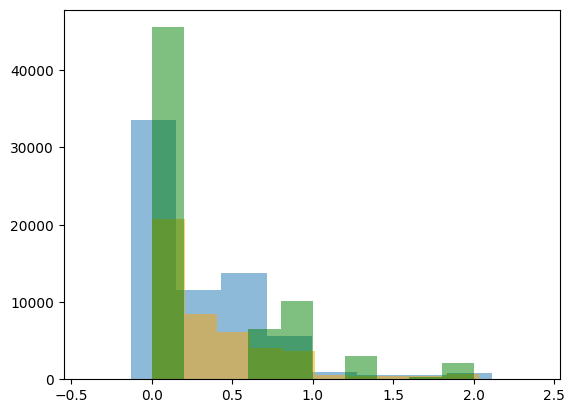

In [42]:
import matplotlib.pyplot as plt
df = current.loc[current['target']!=-1]
plt.hist(df['sxwOBA'], alpha=0.5)
plt.hist(df['estimated_woba_using_speedangle'], alpha=0.5, color='orange')
plt.hist(df['woba_value'], alpha=0.5, color='green')

In [45]:
df['sxwOBA_adj'] = df['sxwOBA'].values
df.loc[df['sxwOBA_adj'] < 0, 'sxwOBA_adj'] = 0

C:\Users\wampl\AppData\Local\Temp\ipykernel_11836\94436381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sxwOBA_adj'] = df['sxwOBA'].values


In [46]:
df['sxwOBA_adj'].mean()

0.326983130185785

In [48]:
df[''].mean()

0.3760984071185323

In [28]:
current.loc[current['target']!=-1]['events'].unique()

array(['field_out', 'grounded_into_double_play', 'walk', 'strikeout',
       'single', 'force_out', 'fielders_choice_out', 'sac_fly',
       'home_run', 'double', 'triple', 'double_play', 'hit_by_pitch',
       'fielders_choice', 'strikeout_double_play', nan,
       'sac_fly_double_play'], dtype=object)

In [29]:
current.loc[current['target']==-1]['events'].unique()

array([nan, 'field_error', 'sac_bunt', 'caught_stealing_2b',
       'caught_stealing_home', 'catcher_interf', 'other_out',
       'pickoff_1b', 'pickoff_caught_stealing_2b', 'caught_stealing_3b',
       'wild_pitch'], dtype=object)

In [31]:
current.loc[current['events']=='field_error'][['estimated_woba_using_speedangle', 'woba_value', 'sxwOBA', 'rf_xwoba']].mean()

estimated_woba_using_speedangle    0.208672
woba_value                         0.900000
sxwOBA                             0.277977
rf_xwoba                           0.291824
dtype: float64

In [40]:
current.nsmallest(10, 'sxwOBA')['events']

79548     field_out
125145    field_out
86493     field_out
128426    field_out
241344    field_out
42164     field_out
127331    field_out
174138    field_out
92551     field_out
156723    field_out
Name: events, dtype: object

In [49]:
current['if_fielding_alignment'].value_counts()

Standard         196044
Strategic         67975
Infield shift         4
Name: if_fielding_alignment, dtype: int64

In [50]:
df_2022 = pd.read_csv('statcast_data/2022.csv')
df_2022['if_fielding_alignment'].value_counts()

Standard         388941
Infield shift    235324
Strategic         68751
Name: if_fielding_alignment, dtype: int64

In [51]:
current['of_fielding_alignment'].value_counts()

Standard     251981
Strategic     12042
Name: of_fielding_alignment, dtype: int64

In [52]:
df_2022['of_fielding_alignment'].value_counts()

Standard          658212
Strategic          32864
4th outfielder      1940
Name: of_fielding_alignment, dtype: int64

In [55]:
current.loc[current['if_fielding_alignment'].isna()]

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,sprint_speed,target,batter_team,pitcher_team,stand_L,stand_R,batter_name,rf_xwoba,sxwOBA,sxwoba_prob_model,pulled_barrel
2244,2244,FF,2023-05-29,93.7,-2.56,5.76,"Jiménez, Joe",665923,641729,walk,ball,NaN,NaN,NaN,NaN,11.0,Esteury Ruiz walks. Shea Langeliers to 3rd. ...,R,R,R,OAK,ATL,B,NaN,NaN,3,1,2023,-0.84,1.43,-0.87,3.01,NaN,669127.0,607054.0,2,8,Bot,NaN,NaN,NaN,NaN,669221,NaN,NaN,6.326417,-136.328346,-4.641544,-11.793093,28.797441,-13.429717,2.99,1.56,NaN,NaN,NaN,95.5,2361.0,7.2,717970,641729,669221,621566,645277,663586,606115,592696,671739,660670,53.28,NaN,NaN,0.7,1.0,0.0,0.0,NaN,68,5,4-Seam Fastball,7,2,7,2,2,7,7,2,NaN,NaN,217.0,0.000,0.239,29.8,1,OAK,ATL,0,1,esteury ruiz,0.7,0.7,NaN,0
2245,2245,FF,2023-05-29,95.5,-2.41,5.81,"Jiménez, Joe",665923,641729,NaN,ball,NaN,NaN,NaN,NaN,14.0,Esteury Ruiz walks. Shea Langeliers to 3rd. ...,R,R,R,OAK,ATL,B,NaN,NaN,2,1,2023,-0.57,1.59,2.01,1.97,NaN,669127.0,607054.0,2,8,Bot,NaN,NaN,NaN,NaN,669221,NaN,NaN,13.130982,-138.267204,-8.172086,-10.198678,30.784966,-9.943877,3.02,1.50,NaN,NaN,NaN,97.0,2435.0,7.4,717970,641729,669221,621566,645277,663586,606115,592696,671739,660670,53.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,4,4-Seam Fastball,7,2,7,2,2,7,7,2,NaN,NaN,215.0,0.000,0.078,29.8,-1,OAK,ATL,0,1,esteury ruiz,NaN,NaN,NaN,0
2246,2246,FF,2023-05-29,94.0,-2.39,5.85,"Jiménez, Joe",665923,641729,NaN,called_strike,NaN,NaN,NaN,NaN,2.0,Esteury Ruiz walks. Shea Langeliers to 3rd. ...,R,R,R,OAK,ATL,S,NaN,NaN,2,0,2023,-0.67,1.58,-0.22,2.90,NaN,669127.0,607054.0,2,8,Bot,NaN,NaN,NaN,NaN,669221,NaN,NaN,7.203410,-136.640833,-5.484654,-9.981093,30.173965,-11.401199,3.15,1.50,NaN,NaN,NaN,95.2,2318.0,7.0,717970,641729,669221,621566,645277,663586,606115,592696,671739,660670,53.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,3,4-Seam Fastball,7,2,7,2,2,7,7,2,NaN,NaN,214.0,0.000,-0.116,29.8,-1,OAK,ATL,0,1,esteury ruiz,NaN,NaN,NaN,0
2247,2247,FF,2023-05-29,94.9,-2.61,5.96,"Jiménez, Joe",665923,641729,NaN,ball,NaN,NaN,NaN,NaN,11.0,Esteury Ruiz walks. Shea Langeliers to 3rd. ...,R,R,R,OAK,ATL,B,NaN,NaN,1,0,2023,-0.72,1.51,-1.46,4.04,NaN,669127.0,607054.0,2,8,Bot,NaN,NaN,NaN,NaN,669221,NaN,NaN,4.682680,-138.152330,-2.757565,-10.230866,32.302126,-12.506388,3.08,1.47,NaN,NaN,NaN,96.1,2355.0,7.1,717970,641729,669221,621566,645277,663586,606115,592696,671739,660670,53.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,4-Seam Fastball,7,2,7,2,2,7,7,2,NaN,NaN,216.0,0.000,0.072,29.8,-1,OAK,ATL,0,1,esteury ruiz,NaN,NaN,NaN,0
2248,2248,SL,2023-05-29,83.2,-2.67,5.81,"Jiménez, Joe",665923,641729,NaN,ball,NaN,NaN,NaN,NaN,11.0,Esteury Ruiz walks. Shea Langeliers to 3rd. ...,R,R,R,OAK,ATL,B,NaN,NaN,0,0,2023,0.43,-0.09,-1.01,2.48,NaN,669127.0,607054.0,2,8,Bot,NaN,NaN,NaN,NaN,669221,NaN,NaN,3.028034,-121.238419,-1.081951,3.719968,20.918294,-33.068393,3.05,1.50,NaN,NaN,NaN,85.0,2087.0,7.1,717970,641729,669221,621566,645277,663586,606115,592696,671739,660670,53.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,1,Slider,7,2,7,2,2,7,7,2,NaN,NaN,106.0,0.000

In [56]:
df_2021 = pd.read_csv('statcast_data/2021.csv')

In [62]:
df_2021.loc[(df_2021['batter']==621493)].shape

(18, 93)